## Plots the mean activation per feature map for a specific layer given an input image

In [25]:
layer = 42
filter = 64  # will be marked with a vertical line in the plot
total_filters_in_layer = 512

In [2]:
from fastai.conv_learner import *

In [3]:
class SaveFeatures():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = torch.tensor(output,requires_grad=True).cuda()
    def close(self):
        self.hook.remove()

In [43]:
picture = PIL.Image.open("test/206px-Wattledcranethumb.jpg")

In [44]:
model = vgg16(pre=True).cuda().eval()
set_trainable(model, False)

In [45]:
sz = 224

In [46]:
train_tfms, val_tfms = tfms_from_model(vgg16, sz)

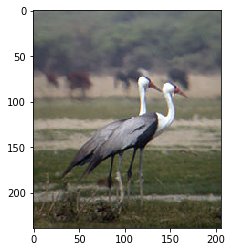

In [47]:
plt.imshow(picture)

In [52]:
transformed = val_tfms(np.array(picture)/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


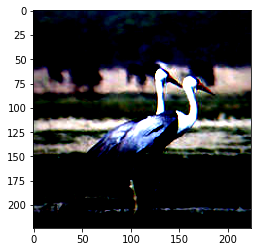

In [53]:
plt.imshow(transformed.transpose(1,2,0))

In [54]:
activations = SaveFeatures(list(model.children())[layer])

In [55]:
model(V(transformed)[None]);

In [56]:
mean_act = [activations.features[0,i].mean().item() for i in range(total_filters_in_layer)]

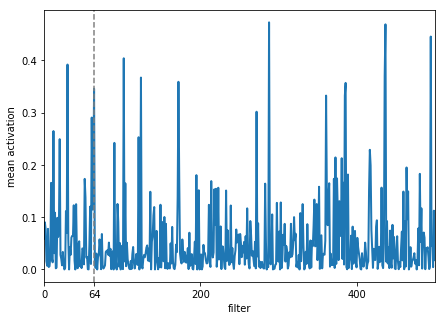

In [57]:
plt.figure(figsize=(7,5))
act = plt.plot(mean_act,linewidth=2.)
extraticks=[filter]
ax = act[0].axes
ax.set_xlim(0,500)
plt.axvline(x=filter, color='grey', linestyle='--')
ax.set_xlabel("feature map")
ax.set_ylabel("mean activation")
ax.set_xticks([0,200,400] + extraticks)
#plt.show()
plt.savefig('mean_activation_layer_'+str(layer)+'_filter_'+str(filter)+'.png')

In [77]:
thresh = 0.44
[i for i in range(total_filters_in_layer) if mean_act[i]>thresh]

[288, 437, 495]

In [42]:
activations.close()